In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, preprocessing, model_selection, pipeline, ensemble, tree, datasets, cluster
sns.set(style = 'white', font_scale = 1.7)

In [30]:
def save(name):
    plt.savefig('C:\\Users\\KNITISH\\Documents\\Articles\\kmeans\\'+name+'.png', bbox_inches = 'tight', dpi = 200)

In [9]:
data  =  pd.DataFrame(datasets.load_boston().data, columns = datasets.load_boston().feature_names)
y = datasets.load_boston().target

features = ['CRIM', 'LSTAT', 'RM', 'AGE', 'INDUS', 'NOX', 'DIS']
data = data[features]
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
data.head()

,CRIM,LSTAT,RM,AGE,INDUS,NOX,DIS
0,0.00632,4.98,6.575,65.2,2.31,0.538,4.0900
1,0.02731,9.14,6.421,78.9,7.07,0.469,4.9671
2,0.02729,4.03,7.185,61.1,7.07,0.469,4.9671
3,0.03237,2.94,6.998,45.8,2.18,0.458,6.0622
4,0.06905,5.33,7.147,54.2,2.18,0.458,6.0622


In [39]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, y, test_size = .2, random_state = 10)

### OLS

In [40]:
model = linear_model.LinearRegression()

score = model_selection.cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2')
print(f'Average r2: {np.mean(score)}')

Average r2: 0.6534847470004668


### Visualize Data in 2 Dimensions

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


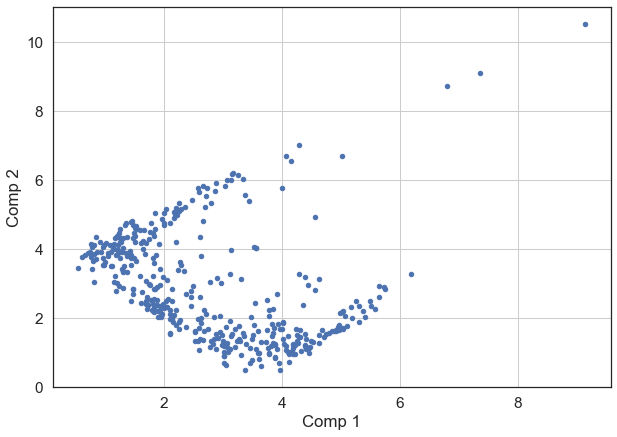

In [52]:
#kmeans = cluster.KMeans(n_clusters = 2).fit(X_train)
kmeans = pipeline.make_pipeline(preprocessing.StandardScaler(), cluster.KMeans(n_clusters = 2)).fit(X_train)
lower_dim = pd.DataFrame(kmeans.transform(X_train), columns = ['Comp 1', 'Comp 2'])


lower_dim.plot.scatter( x='Comp 1',y= 'Comp 2', grid = True, figsize = (10, 7),)
save('DimReduction')

####  Train KMeans

In [ ]:
model = linear_model.LinearRegression()

score = model_selection.cross_val_score(model, X_train, y_train, cv = 10, scoring = 'r2')
print(f'Average r2: {np.mean(score)}')

In [47]:
km = pipeline.make_pipeline(preprocessing.StandardScaler(), cluster.KMeans(n_clusters = 5),
                           linear_model.LinearRegression())

score = model_selection.cross_val_score(km, X_train, y_train, cv = 10, scoring = 'r2')
print(f'Average r2: {np.mean(score)}')

Average r2: 0.6751640572278654


#### Anomaly Detection using K-Means

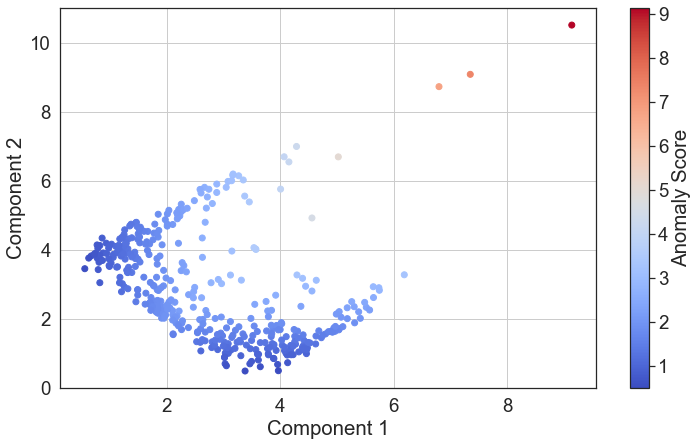

In [67]:
km = pipeline.make_pipeline(preprocessing.StandardScaler(), cluster.KMeans(n_clusters = 5)).fit(X_train)

transformed = pd.DataFrame(km.transform(X_train))

# Calculate the Anomaly score - as the minimum distance of a point to any cluster center
anomaly_score = lower_dim.min(axis = 1)

plt.figure( figsize = (12, 7))
plt.scatter(x=lower_dim['Comp 1'],y= lower_dim['Comp 2'], c = anomaly_score, cmap = 'coolwarm')
plt.colorbar(label = 'Anomaly Score')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
save('colored_anomaly')